In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from sklearn.cluster import KMeans
import re
import preprocessor as p#forming a separate feature for cleaned tweets
import string
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
from sklearn.metrics import adjusted_rand_score
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexkroeker/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data = []
for file in range(14):
    data.append(open('Tweet-Data/Cyber_Twin_tweets-'+str(2007+file)+'.jl'))

In [3]:
doc = []
for file in data:
    for line in file:
        doc.append(json.loads(line))

In [4]:
len(doc)

16

In [5]:
emptyList = []
for dict in doc:
    emptyList.append(dict['response'])
    

In [6]:
len(emptyList)

16

In [7]:
def check(dictionary):
    if dictionary['result_count'] == 0: return False
    else: return True

In [8]:
emptyData = []
for dict in emptyList:
    if check(dict['meta']): emptyData.append(dict['data'])

In [9]:
len(emptyData)


16

In [10]:
pd.DataFrame(emptyData[2])

,in_reply_to_user_id,lang,text,source,conversation_id,id,entities,referenced_tweets,reply_settings,created_at,possibly_sensitive,author_id,public_metrics
0,37033652,en,@Soap_Dude I think we may be cyber twins! Cyb...,Twitter Web Client,6998896387,6998933173,"{'mentions': [{'start': 0, 'end': 10, 'usernam...","[{'type': 'replied_to', 'id': '6998896387'}]",everyone,2009-12-24T13:12:22.000Z,False,24635996,"{'retweet_count': 0, 'reply_count': 0, 'like_c..."
1,35210636,en,@xXJayHXx we can enter guiness book of world r...,Twitter Web Client,6995536474,6995573436,NaN,"[{'type': 'replied_to', 'id': '6995536474'}]",everyone,2009-12-24T09:56:37.000Z,False,77690709,"{'retweet_count': 0, 'reply_count': 0, 'like_c..."
2,73804948,en,@katanova ive found my cyber twin on twitter,Twitter Web Client,6968136080,6968174431,"{'annotations': [{'start': 37, 'end': 43, 'pro...","[{'type': 'replied_to', 'id': '6968136080'}]",everyone,2009-12-23T15:57:29.000Z,False,77690709,"{'retweet_count': 0, 'reply_count': 0, 'like_c..."
3,55701004,en,@NafeezaKhan We're cyber twins! Nite sis! *hugs*,Twitter Web Client,6455094575,6455449268,"{'mentions': [{'start': 0, 'end': 12, 'usernam...","[{'type': 'replied_to', 'id': '6455094575'}]",everyone,2009-12-08T05:24:54.000Z,False,20677567,"{'retweet_count': 0, 'reply_count': 0, 'like_c..."
4,NaN,fr,Fender Cyber-Twin Amplifier (West Vancouver) $...,Twitter Web Client,6226703730,6226703730,NaN,NaN,everyone,2009-12-01T05:33:26.000Z,False,87062625,"{'retweet_count': 0, 'reply_count': 0, 'like_c..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,NaN,en,is rocking out with his new Cyber-Twin SE guit...,Twitter Web Client,1147143584,1147143584,"{'annotations': [{'start': 28, 'end': 47, 'pro...",NaN,everyone,2009-01-25T18:28:51.000Z,False,7440372,"{'retweet_count': 0, 'reply_count': 0, 'like_c..."
90,NaN,en,Not for the first time ;) Cyber-twin :D .......,Twitter Web Client,1140250846,1140250846,"{'mentions': [{'start': 51, 'end': 61, 'userna...",NaN,everyone,2009-01-22T21:39:28.000Z,False,16139887,"{'retweet_count': 0, 'reply_count': 0, 'like_c..."
91,NaN,en,~ My Fender Cyber-Twin SE guitar amp arrived a...,Twitter Web Client,1130988028,1130988028,"{'annotations': [{'start': 48, 'end': 58, 'pro...",NaN,everyone,2009-01-19T18:01:57.000Z,False,7440372,"{'retweet_count': 0, 'reply_count': 0, 'like_c..."
92,18258537,en,@achristina Cause we cyber-twins. LOL. I love ...,Twitter Web Client,1117112985,1117132297,"{'annotations': [{'start': 46, 'end': 54, 'pro...","[{'type': 'replied_to', 'id': '1117112985'}]",everyone,2009-01-14T01:08:06.000Z,False,17175834,"{'retweet_count': 0, 'reply_count': 0, 'like_c..."


In [11]:
df = pd.DataFrame(emptyData[0])

In [12]:
for obj in range(1,len(emptyData)):
    df = df.append(pd.DataFrame(emptyData[obj]))

In [13]:
df.shape

(3949, 16)

In [14]:
df_clean = df

In [15]:
df_clean.to_pickle("../dummy.pkl2")

In [16]:
df_clean = pd.read_pickle("../dummy.pkl2")

In [17]:
df_clean = df_clean[['lang','author_id','source','text', 'created_at']]

In [18]:
def isRT(text):
        if text.startswith("RT"): return "True"
        else: return "False"

In [19]:
df_clean['is_RT'] = df_clean['text'].map(isRT)

In [20]:
df_clean = df_clean[df_clean['is_RT']=="False"]

In [21]:
df_clean.shape

(3435, 6)

In [22]:
import seaborn as sns

/Users/alexkroeker/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lang', ylabel='count'>

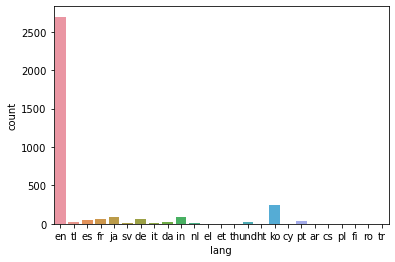

In [23]:
sns.countplot(df_clean['lang'])

In [24]:
df_lang = df_clean.copy()
df_lang = df_lang.groupby('lang').agg({'lang':'count'})
df_lang

,lang
lang,
ar,1
cs,1
cy,1
da,28
de,67
el,2
en,2696
es,52
et,1


In [25]:
df_clean = df_clean[(df_clean['lang'] == "en")]

In [26]:
df_clean = df_clean.drop(['is_RT'], axis=1)

In [27]:
df_clean.nunique()

lang             1
author_id     1552
source         125
text          2560
created_at    2603
dtype: int64

In [28]:
def createdAt(date):
    return date.split('-')[:1][0]
    

In [29]:
df_clean['year'] = df_clean.created_at.map(createdAt)
df_clean.head(20)

,lang,author_id,source,text,created_at,year
0,en,6411542,Twitter Web Client,Needing a cyber twin with automated posting,2007-09-28T06:48:15.000Z,2007
1,en,9004672,Twitter Web Client,I'm wasting time making folks chat with my cyb...,2007-09-27T21:43:39.000Z,2007
2,en,6458682,Twitter Web Client,"Just updated my cyber twin, you can talk to hi...",2007-06-02T14:23:26.000Z,2007
3,en,810660,Twitter Web Client,training my 'Cyber Twin' - He seems like a bit...,2007-05-19T04:20:04.000Z,2007
4,en,4226431,Twitter Web Client,Reading a random conversation between someone ...,2007-04-26T17:34:20.000Z,2007
5,en,1484721,Twitter Web Client,"Shit, building this cyber twin... I feel like ...",2007-04-16T07:20:17.000Z,2007
6,en,3043001,Twitter Web Client,My cyber twin keeps getting better and better....,2007-04-14T06:47:42.000Z,2007
7,en,3043001,Twitter Web Client,Updated my cyber twin today. If you want to ki...,2007-04-12T22:28:42.000Z,2007
8,en,1321201,Twitter Web Client,my last update was too long winded. Chat with ...,2007-04-10T21:01:50.000Z,2007
9,en,1321201,Twitter Web Client,"I'm home between meetings, checking my email. ...",2007-04-10T21:00:38.000Z,2007


In [30]:
df_clean = df_clean.drop(columns=['created_at', 'lang'], axis=1)

In [31]:
df_clean['hashtag'] = df_clean['text'].apply(lambda x: re.findall(r"#(\w+)", x))
df_clean

,author_id,source,text,year,hashtag
0,6411542,Twitter Web Client,Needing a cyber twin with automated posting,2007,[]
1,9004672,Twitter Web Client,I'm wasting time making folks chat with my cyb...,2007,[]
2,6458682,Twitter Web Client,"Just updated my cyber twin, you can talk to hi...",2007,[]
3,810660,Twitter Web Client,training my 'Cyber Twin' - He seems like a bit...,2007,[]
4,4226431,Twitter Web Client,Reading a random conversation between someone ...,2007,[]
...,...,...,...,...,...
211,29346172,Twitter Web Client,Check out this Fender Cyber Twin on Reverb htt...,2020,[]
214,1159247409303580672,Twitter for Android,@TeamAPS Power bond into Cyber Twin Dragon and...,2020,[]
219,17911071,Twitter for iPhone,“What’s going to happen if your cyber twin (co...,2020,[NestaPredicts]
223,2952712126,Twitter Web App,@6188bbe69a9545e Impossible... you have Cyber ...,2020,[]


In [32]:
df_clean.to_pickle('../data_clean_en_year2.plk') 

In [33]:
text = df_clean['text']

In [34]:
text = text.tolist()

In [35]:
for i,v in enumerate(text):
    text[i] = p.clean(v)

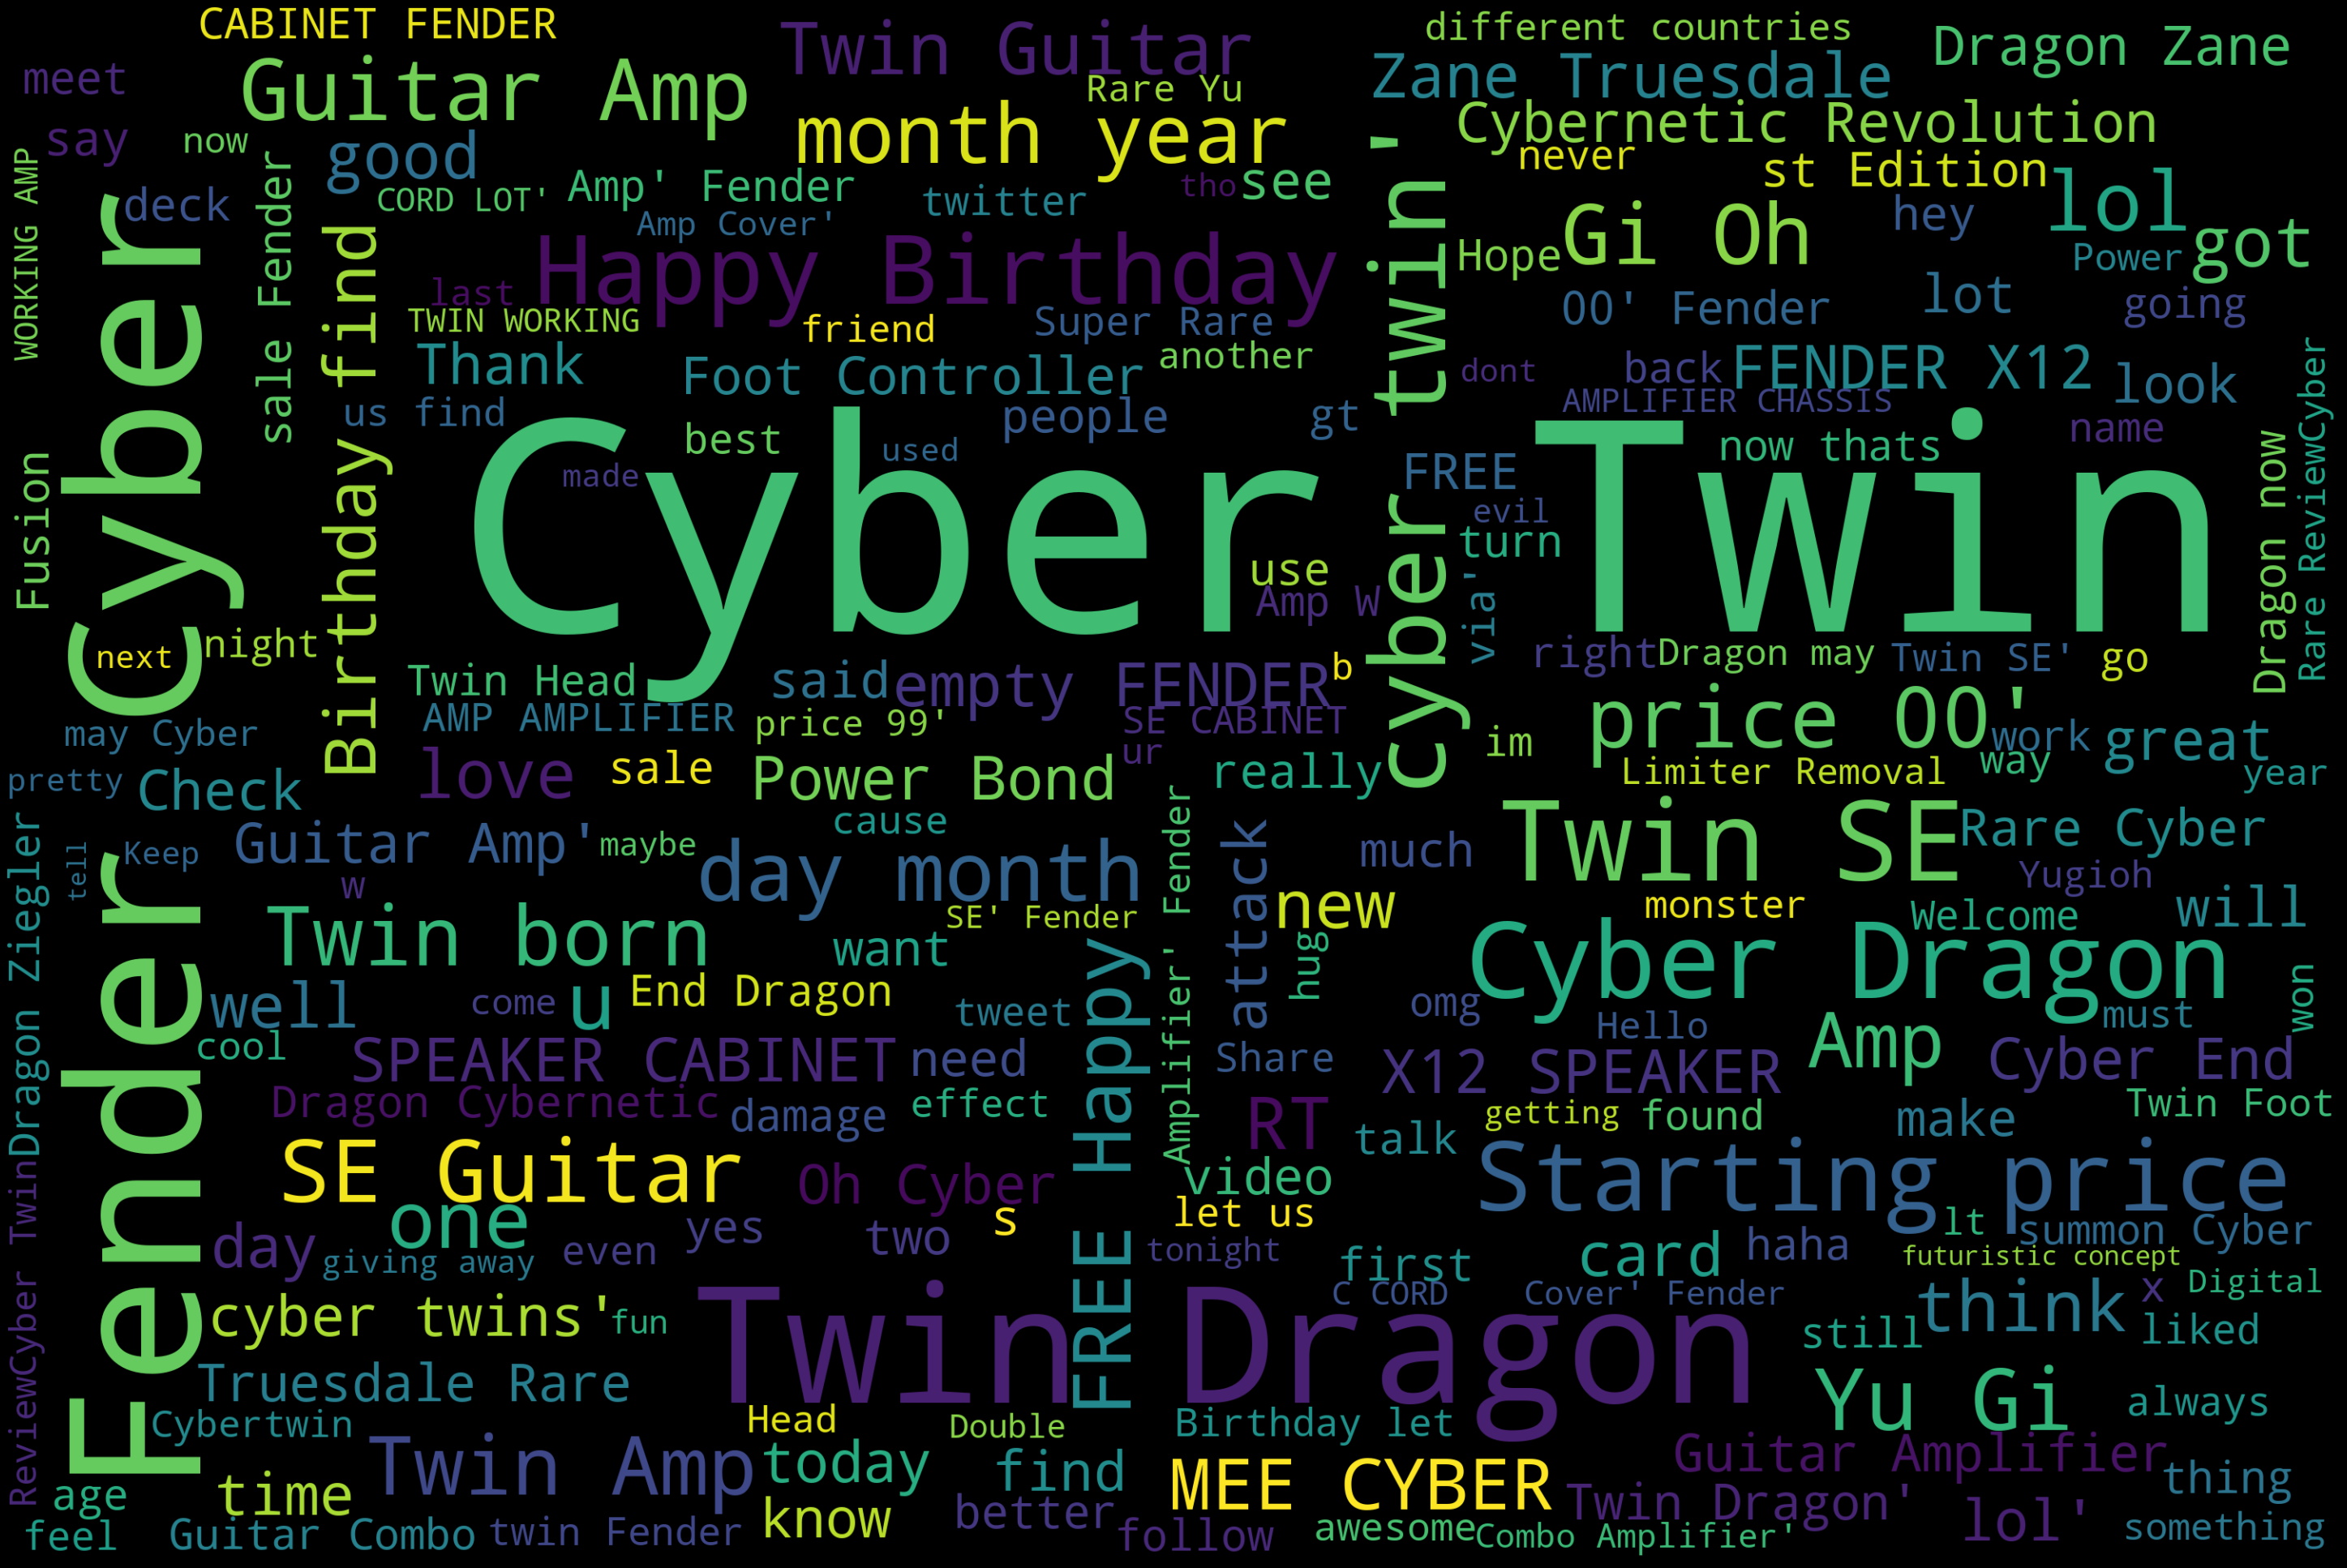

In [36]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [37]:
pd.DataFrame(text).to_pickle("../text_preprocessing2")

In [38]:
def txt_cleaner(text):
    
    text = text.encode(encoding="ascii", errors="ignore")
    text = text.decode() # removing unicode from the text 
    
    text = p.clean(text)
    
    text = text.lower() #lowering all the text
    
    punct = set(string.punctuation)
    text = "".join([ch for ch in text if ch not in punct]) #remove punctation
    
    stop_words = set(stopwords.words("english"))
    text = " ".join([word for word in text.split() if word not in stop_words]) #remove stopwords
    # try out stemming and lemmatization
    return text

In [39]:
df_clean['text'] = df_clean.text.map(txt_cleaner)

In [42]:
df_clean = df_clean.drop_duplicates(subset=['text'])

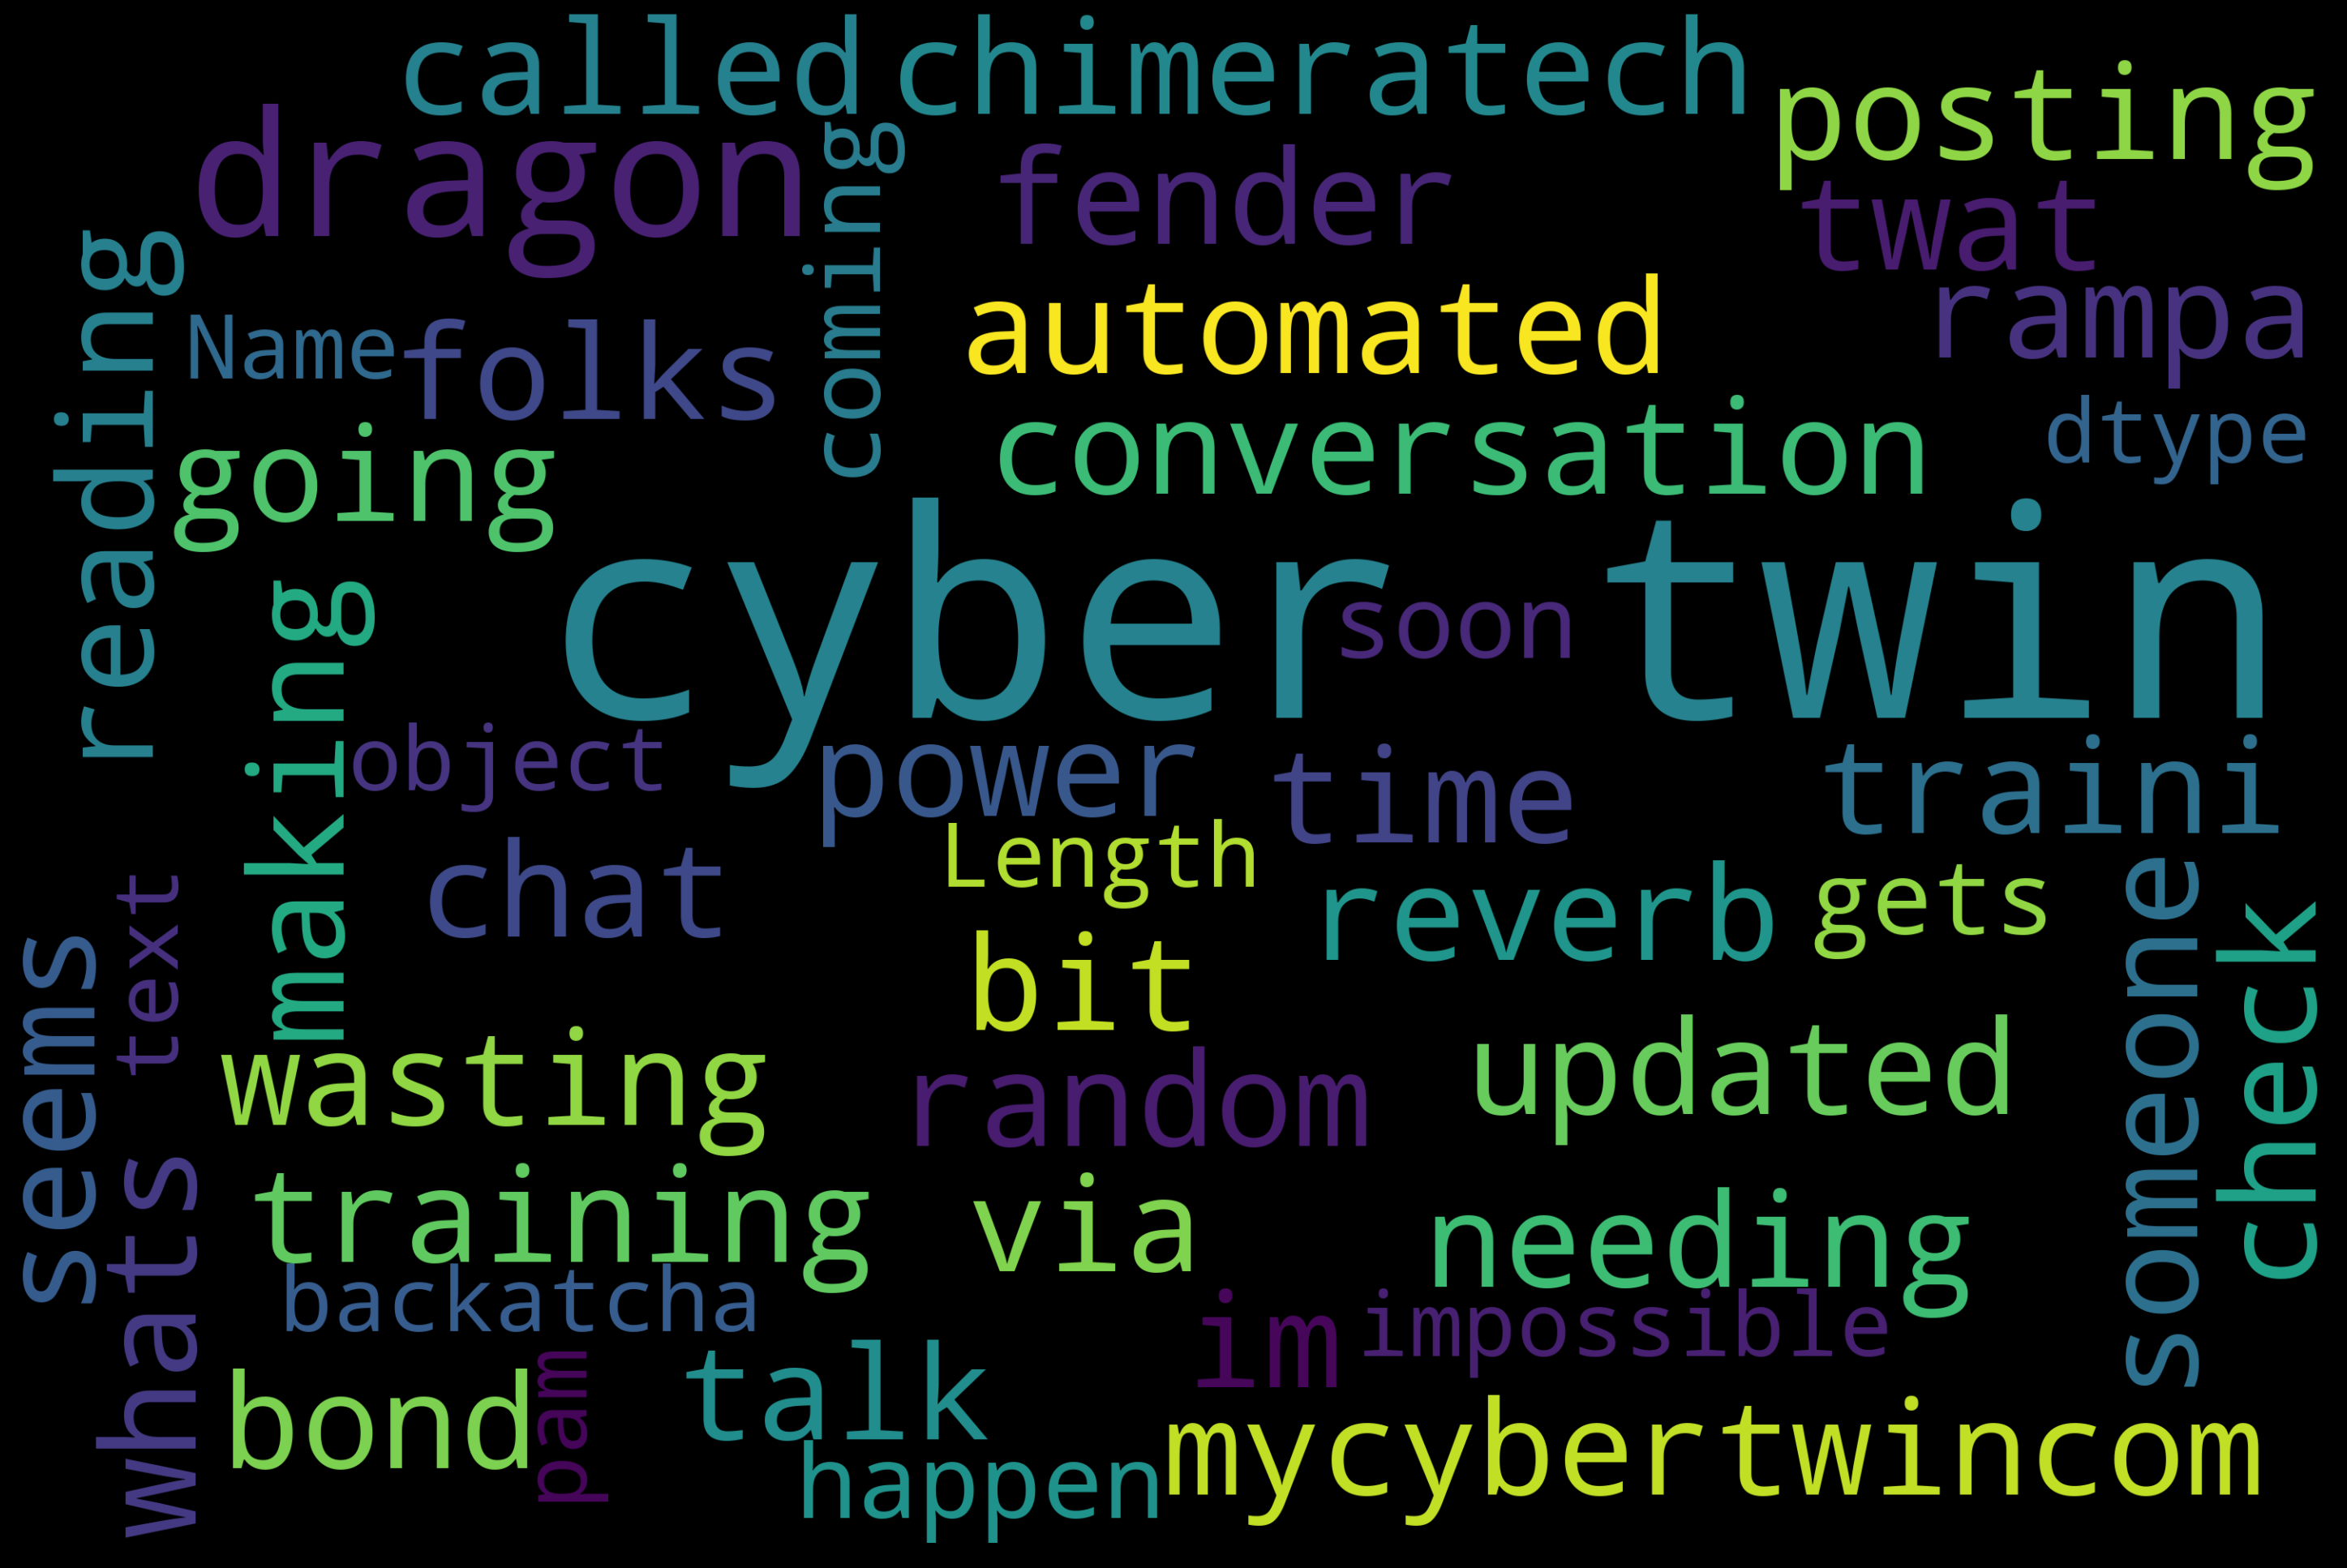

In [43]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(df_clean['text']))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
df_clean['text']

In [ ]:
documents = df_clean['text']

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

print("\n")
print("Prediction")

Y = vectorizer.transform(["Azure is the leading IOT"])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["Data Analysis is a trend for amp"])
prediction = model.predict(Y)
print(prediction)